## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## Data Loading

In [2]:
# Read the training data
df = pd.read_csv('training.csv')
# Read the testing data
dftest = pd.read_csv('testing.csv')

# K-Nearest Neighbors (KNN) and Naive Bayes

## Exploratory Data Analysis (EDA)

### Dataset Overview

In [3]:
# Summary for training set
print("Training set summary stats")
df.info()

# Summary for test set
print("\n\nTesting set summary stats")
dftest.info()

# Checking for missing and duplicate values
print('\n\nnull and duplicate values')
print('\nTraining Set:')
print(f"Total null values: {df.isnull().sum().sum()}")
print(f"Total duplicate values: {df.duplicated().sum()}")

print('\nTesting Set:')
print(f"Total null values: {dftest.isnull().sum().sum()}")
print(f"Total duplicate values: {dftest.duplicated().sum()}")

Training set summary stats
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Columns: 148 entries, class to GLCM3_140
dtypes: float64(133), int64(14), object(1)
memory usage: 194.4+ KB


Testing set summary stats
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Columns: 148 entries, class to GLCM3_140
dtypes: float64(133), int64(14), object(1)
memory usage: 586.3+ KB


null and duplicate values

Training Set:
Total null values: 0
Total duplicate values: 0

Testing Set:
Total null values: 0
Total duplicate values: 0


### Class Distribution

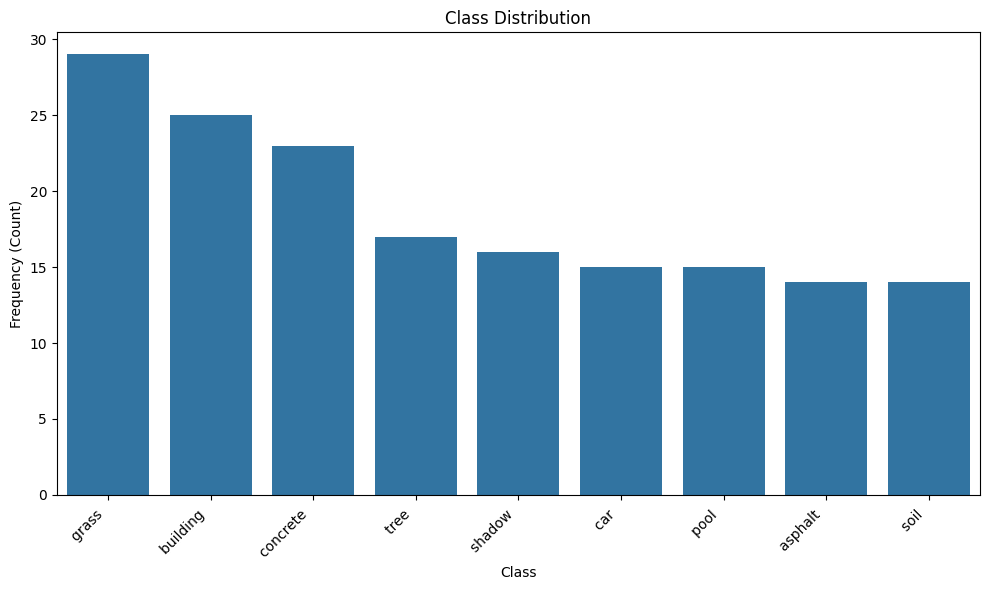

In [4]:
# Creating a bar graph showing class distibution
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df, order=df['class'].value_counts().index)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency (Count)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Data Visualization

#### Histogram of Feature Variances

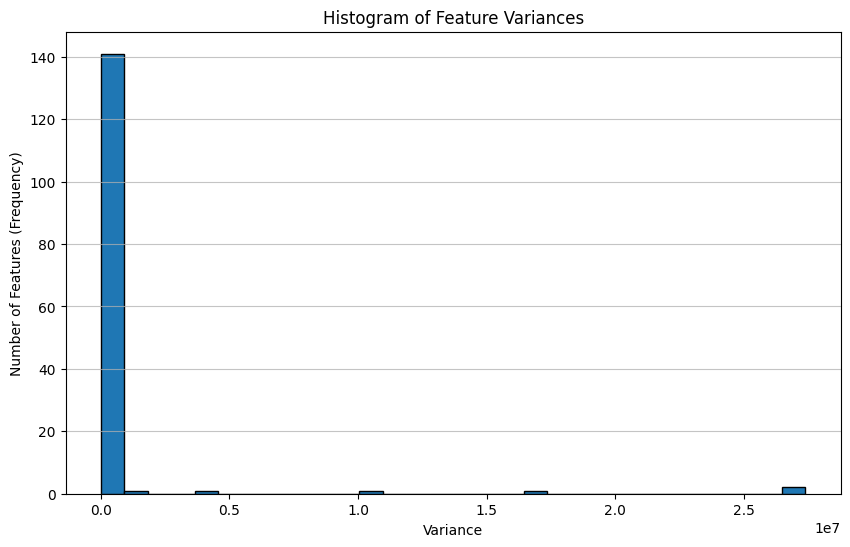

In [5]:
# Create a new DataFrame without the 'class' column
numeric_df = df.drop('class', axis=1)
# Calculate the variance for each feature
feature_variances = numeric_df.var()

# Create the histogram plot
plt.figure(figsize=(10, 6))
plt.hist(feature_variances, bins=30, edgecolor='black')
plt.title('Histogram of Feature Variances')
plt.xlabel('Variance')
plt.ylabel('Number of Features (Frequency)')
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Correlation Heatmap

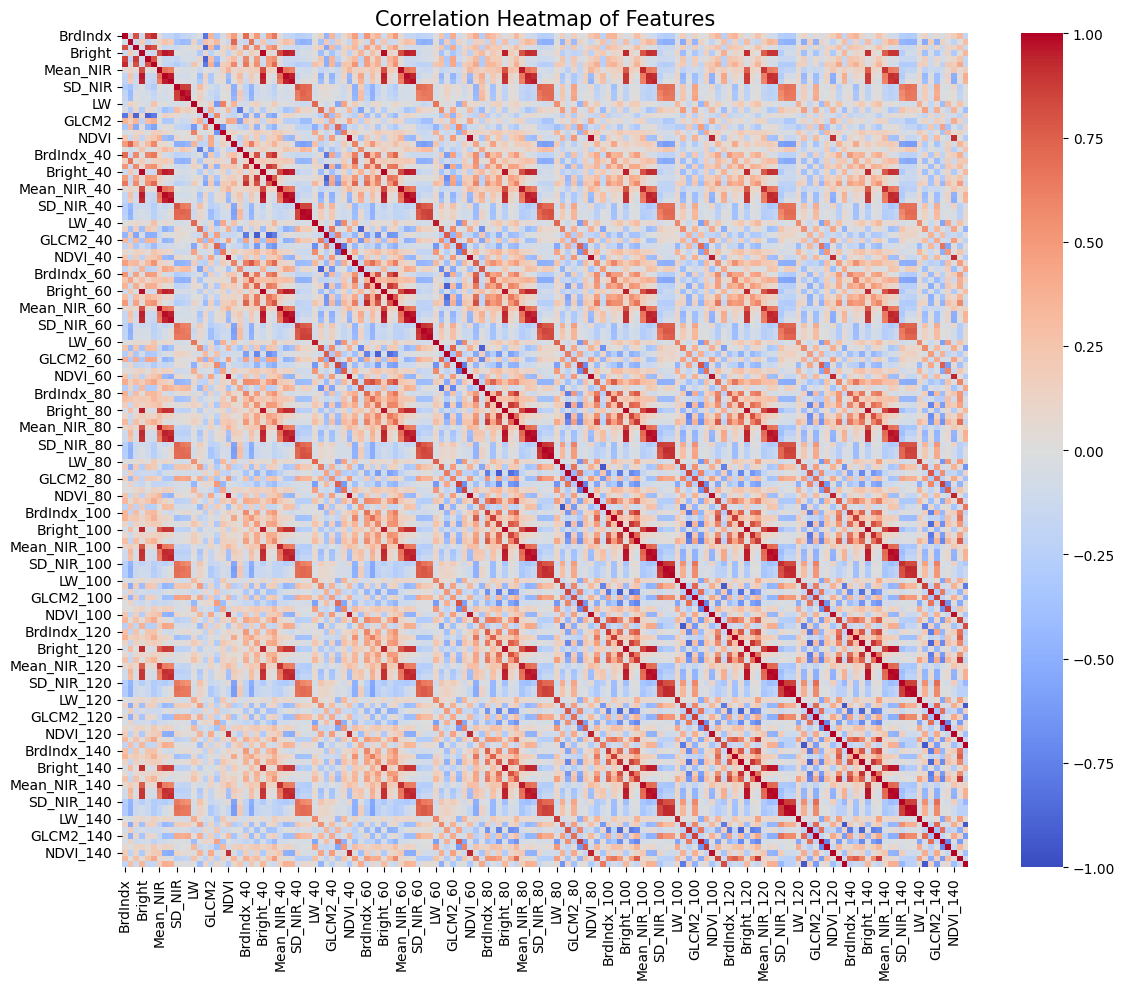

In [6]:
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap plot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=False,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            center=0)
plt.title('Correlation Heatmap of Features', fontsize=15)
plt.tight_layout()
plt.show()

#### Boxplots for Selected Features by Class

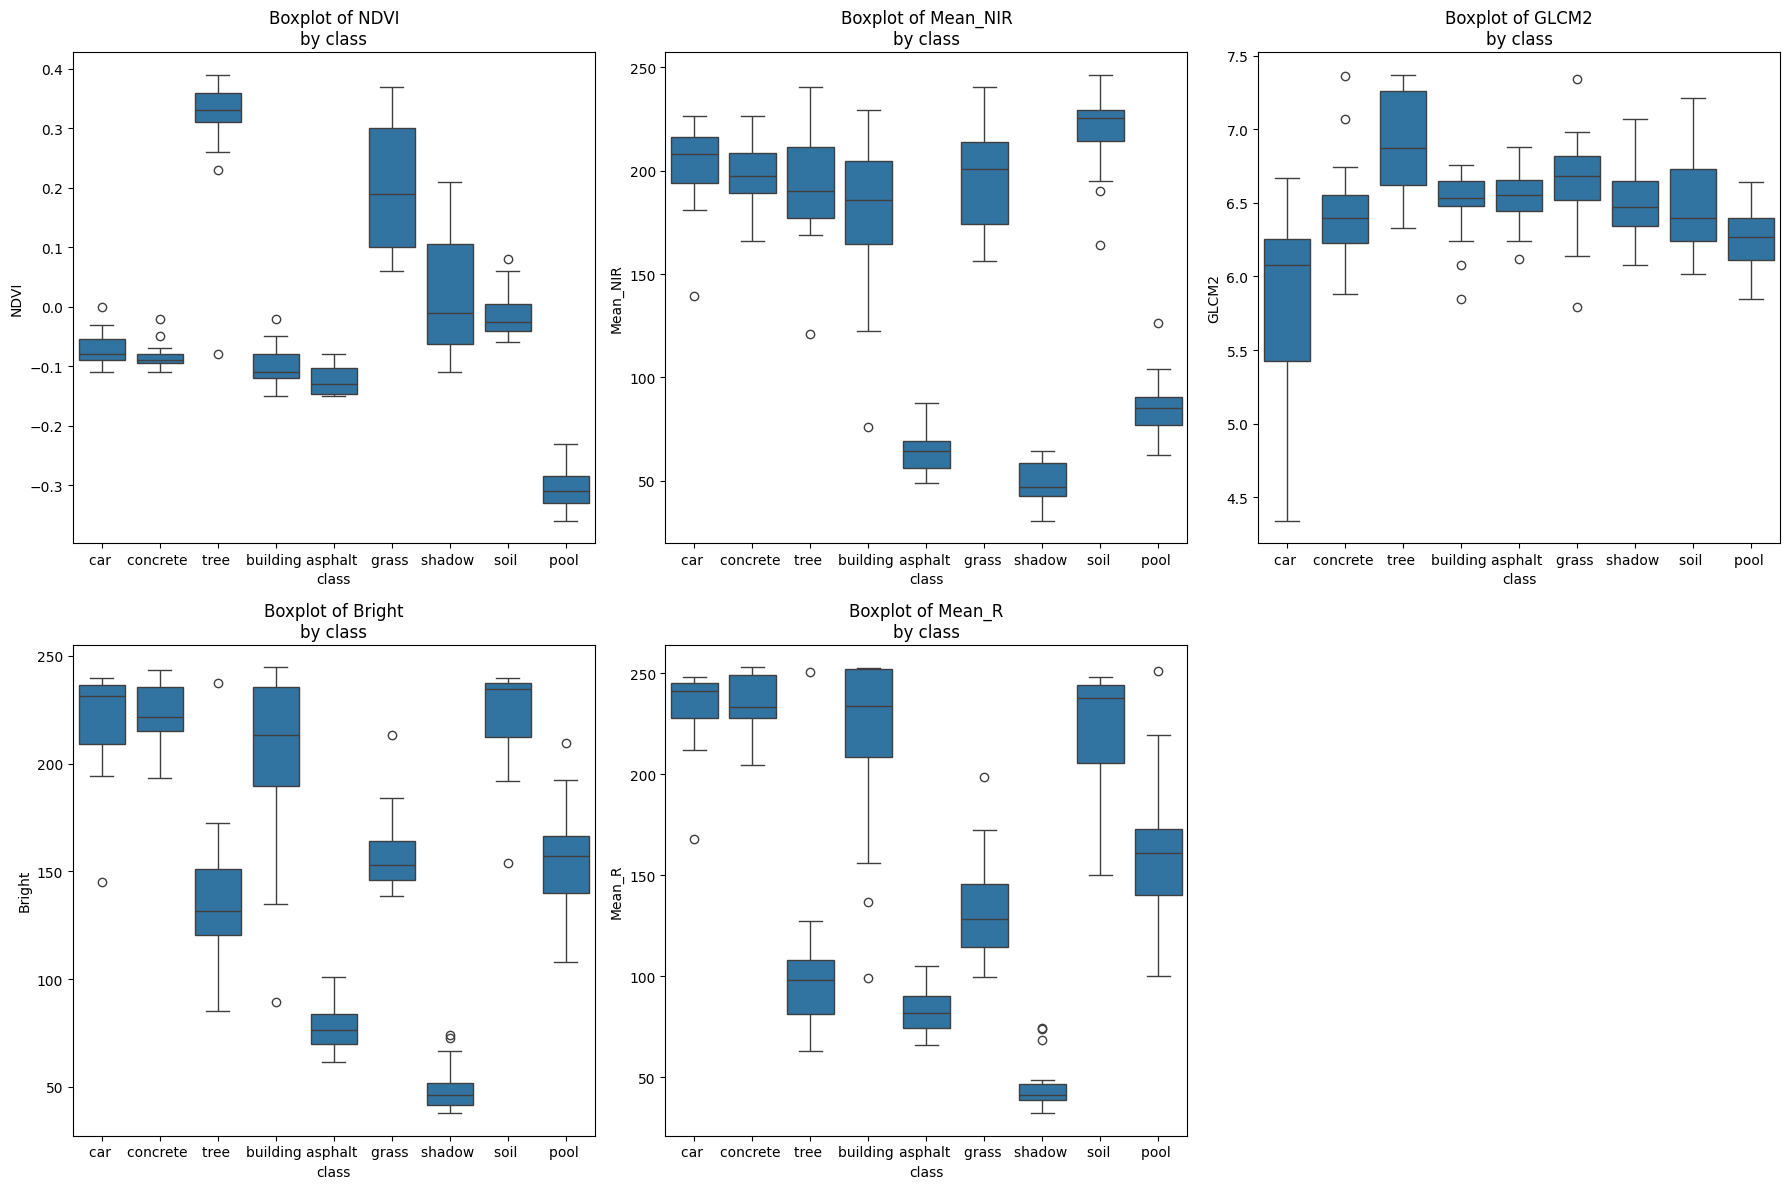

In [7]:
# Define the target and features to plot
target_column_name = 'class'
selected_features_for_boxplot = ['NDVI', 'Mean_NIR', 'GLCM2', 'Bright', 'Mean_R']

# Create a grid of boxplots
plt.figure(figsize=(18, 12))
for i, feature_name in enumerate(selected_features_for_boxplot):
   # Create a subplot for each feature
   plt.subplot(2, 3, i + 1)
   sns.boxplot(x=target_column_name, y=feature_name, data=df)
   plt.title(f'Boxplot of {feature_name}\nby {target_column_name}')
   plt.xlabel(target_column_name)
   plt.ylabel(feature_name)

plt.tight_layout()
plt.show()

##  Feature Selection and Analysis

Top 5 features by F score:
- Mean_NIR
- NDVI
- NDVI_40
- Mean_NIR_60
- NDVI_60


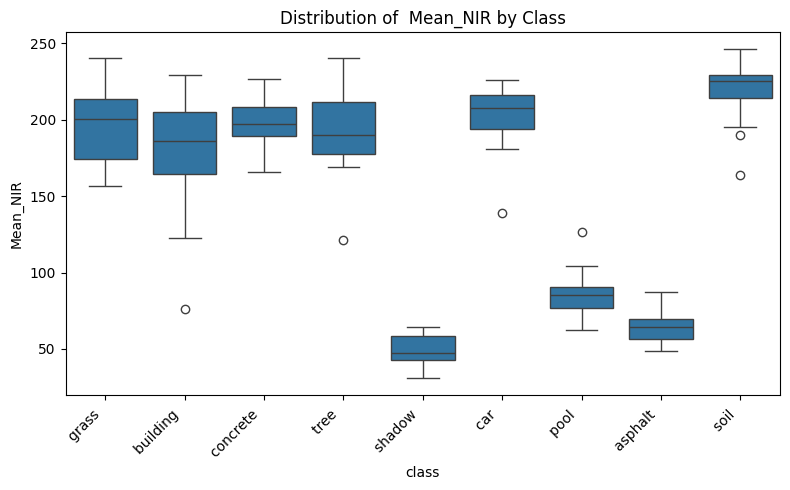

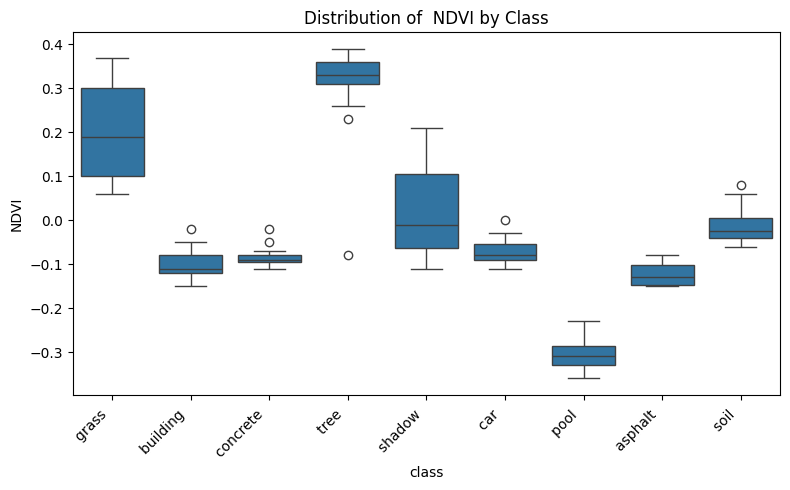

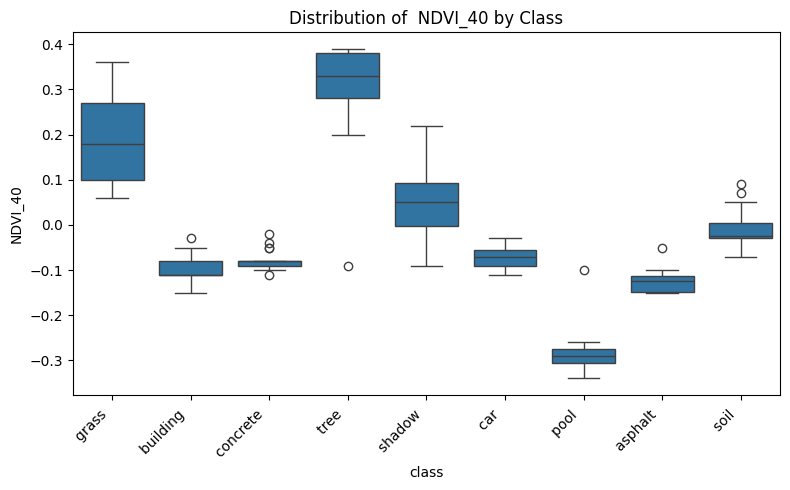

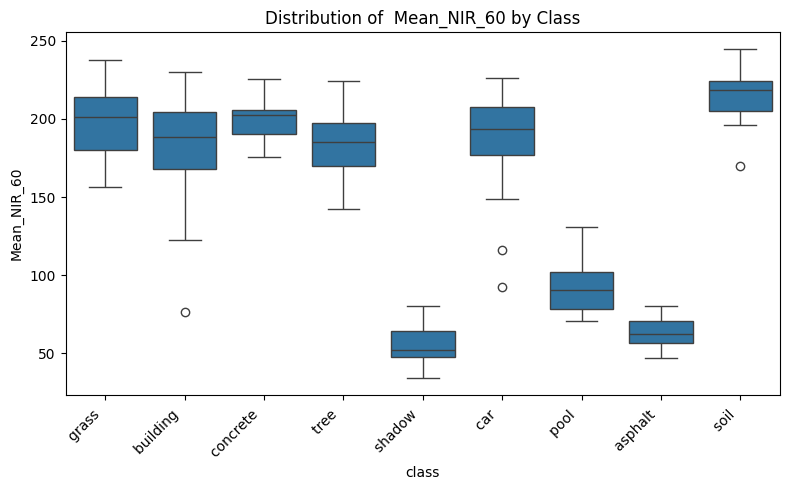

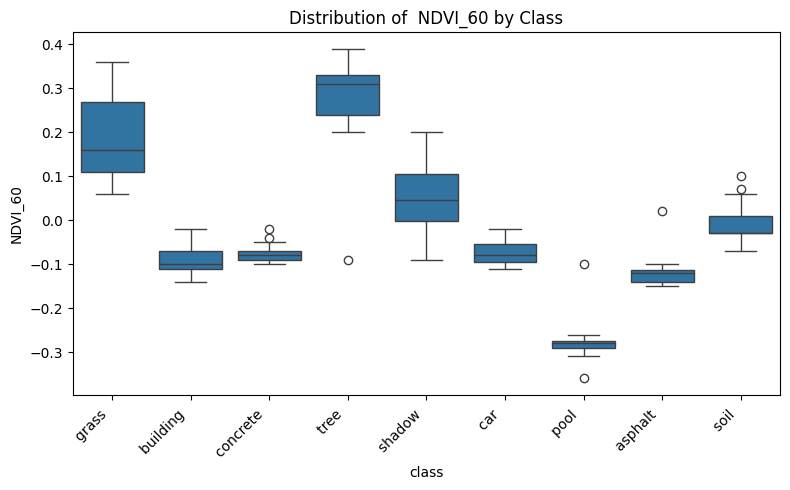

In [8]:
# Separate features X and the target variable y
X = df.drop('class', axis=1)
y = df['class']

# Use SelectKBest to find the top 5 features
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X, y)

# Get the names of the selected features
top_features_names = X.columns[selector.get_support()].tolist()

# Print the names of the top 5 features
print("Top 5 features by F score:")
for name in top_features_names:
    print(f"- {name}")

# Create a temporary df for plotting
df_plot_selected = X[top_features_names].copy()
df_plot_selected['class'] = y.reset_index(drop=True)
class_order_for_plot = df['class'].value_counts().index

# Create a boxplot for each of the top 5 features
for feature_name in top_features_names:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='class', y=feature_name, data=df_plot_selected, order=class_order_for_plot)
    plt.title(f'Distribution of  {feature_name} by Class')
    plt.ylabel(f'{feature_name}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Data Preprocessing for Models

In [9]:
# Separate features X and target y for training and testing sets
X_train = df.drop('class', axis=1)
y_train = df['class']

X_test = dftest.drop('class', axis= 1)
y_test = dftest['class']

# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training data scaled. Shape: {X_train_scaled.shape}")
print(f"Test data scaled. Shape: {X_test_scaled.shape}")

Training data scaled. Shape: (168, 147)
Test data scaled. Shape: (507, 147)


## Naive Bayes Model

Naive Bayes Model Performance (Top 5 Features):
Accuracy: 0.6963

Classification Report:
              precision    recall  f1-score   support

    asphalt        0.82      0.82      0.82        45
   building        0.68      0.42      0.52        97
        car        0.20      0.24      0.22        21
   concrete        0.63      0.82      0.71        93
      grass        0.69      0.84      0.76        83
       pool        1.00      0.93      0.96        14
     shadow        0.84      0.80      0.82        45
       soil        0.53      0.95      0.68        20
       tree        0.89      0.63      0.74        89

    accuracy                           0.70       507
   macro avg       0.70      0.72      0.69       507
weighted avg       0.72      0.70      0.69       507



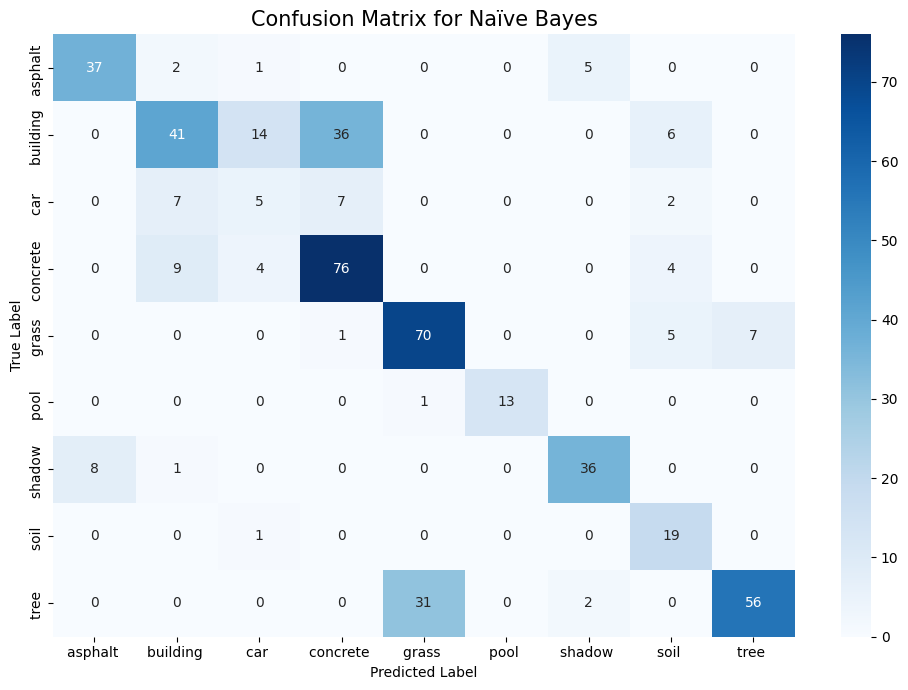

In [10]:
# Get the indices of the top 5 features
top_feature_indices = [X_train.columns.get_loc(col) for col in top_features_names]

# Filter the scaled training and test sets to include only the top 5 features
X_train_nb = X_train_scaled[:, top_feature_indices]
X_test_nb = X_test_scaled[:, top_feature_indices]

# Initialize the Gaussian Naïve Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_nb, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test_nb)

# Evaluate the model's performance
print("Naive Bayes Model Performance (Top 5 Features):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Get unique class labels for the confusion matrix
class_labels = np.unique(np.concatenate((y_test, y_pred_nb)))

# Generate the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=class_labels)
cm_df_nb = pd.DataFrame(cm_nb, index=class_labels, columns=class_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naïve Bayes', fontsize=15)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## K-Nearest Neighbors (KNN) Model

### Using Cross Validation to find optimal 'k'

k=1, CV Mean Accuracy: 0.7431
k=2, CV Mean Accuracy: 0.7729
k=3, CV Mean Accuracy: 0.7679
k=4, CV Mean Accuracy: 0.7622
k=5, CV Mean Accuracy: 0.7918
k=6, CV Mean Accuracy: 0.7742
k=7, CV Mean Accuracy: 0.7742
k=8, CV Mean Accuracy: 0.7679
k=9, CV Mean Accuracy: 0.7918
k=10, CV Mean Accuracy: 0.7738
k=11, CV Mean Accuracy: 0.7799
k=12, CV Mean Accuracy: 0.7677
k=13, CV Mean Accuracy: 0.7619
k=14, CV Mean Accuracy: 0.7558
k=15, CV Mean Accuracy: 0.7383
k=16, CV Mean Accuracy: 0.7439
k=17, CV Mean Accuracy: 0.7501
k=18, CV Mean Accuracy: 0.7378
k=19, CV Mean Accuracy: 0.7201
k=20, CV Mean Accuracy: 0.7082

Best k based on cross-validation: 5 with CV accuracy: 0.7918


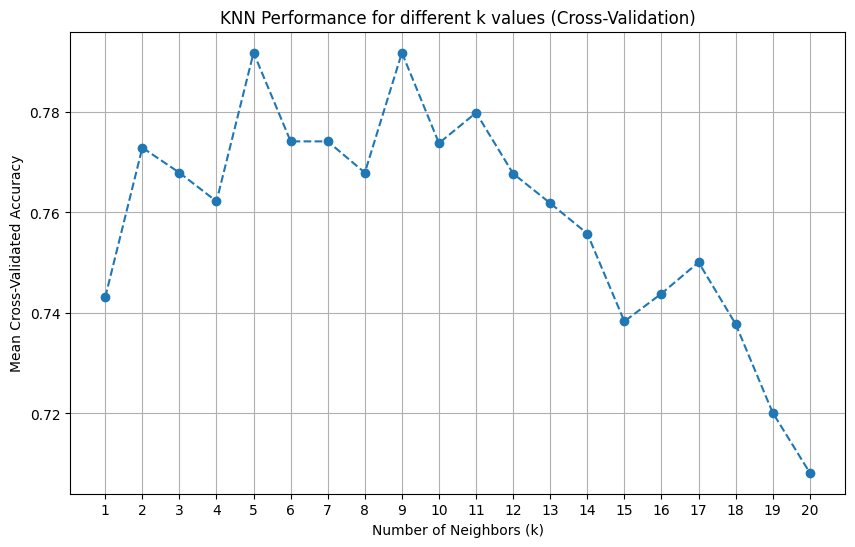

In [11]:
# Define the range of 'k' values to test
k_range = range(1, 21)
cv_scores = []

# Loop through each k value in the range
for k_val in k_range:
    # Initialize the KNN model with the current k value
    knn = KNeighborsClassifier(n_neighbors=k_val)
    # Perform 5-fold cross-validation
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    # Append the mean of the scores to our list
    cv_scores.append(scores.mean())
    print(f"k={k_val}, CV Mean Accuracy: {scores.mean():.4f}")

# Find the best k value
best_k_cv = k_range[np.argmax(cv_scores)]
print(f"\nBest k based on cross-validation: {best_k_cv} with CV accuracy: {max(cv_scores):.4f}")

# Plot the accuracy scores for each k value
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o', linestyle='dashed')
plt.title('KNN Performance for different k values (Cross-Validation)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

### Final KNN Model Evaluation

KNN Model Accuracy (k=5): 0.7239

Classification Report:
              precision    recall  f1-score   support

    asphalt        0.76      0.71      0.74        45
   building        0.86      0.67      0.75        97
        car        0.94      0.81      0.87        21
   concrete        0.72      0.82      0.76        93
      grass        0.65      0.71      0.68        83
       pool        0.79      0.79      0.79        14
     shadow        0.70      0.69      0.70        45
       soil        0.25      0.35      0.29        20
       tree        0.78      0.78      0.78        89

    accuracy                           0.72       507
   macro avg       0.72      0.70      0.71       507
weighted avg       0.74      0.72      0.73       507



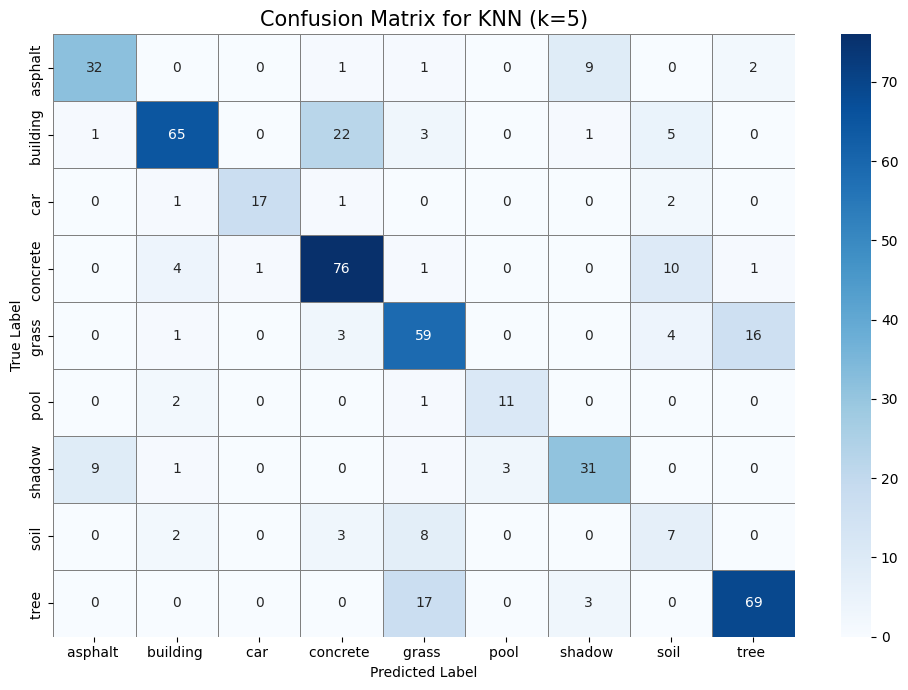

In [12]:
# Set k to the best value found
k = best_k_cv
# Initialize the final KNN model
knn_model = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
print(f"KNN Model Accuracy (k={k}): {accuracy_score(y_test, y_pred_knn):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# Get unique class labels for the confusion matrix
class_labels = np.unique(np.concatenate((y_test, y_pred_knn)))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn, labels=class_labels)
cm_df = pd.DataFrame(cm,
                     index = class_labels,
                     columns = class_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df,
            annot=True,
            fmt='d',
            cmap='Blues',
            linewidths=.5,
            linecolor='gray')

plt.title(f'Confusion Matrix for KNN (k={best_k_cv})', fontsize=15)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Exploring Artificial Neural Networks

## Base line model with single hidden layer

Fitting 10 folds for each of 25 candidates, totalling 250 fits

Best parameters found: {'hidden_layer_sizes': (15,), 'max_iter': 200}
Highest 10-fold CV Accuracy: 0.7555

Final test accuracy of the optimal model: 0.5917
Number of iterations run: 56


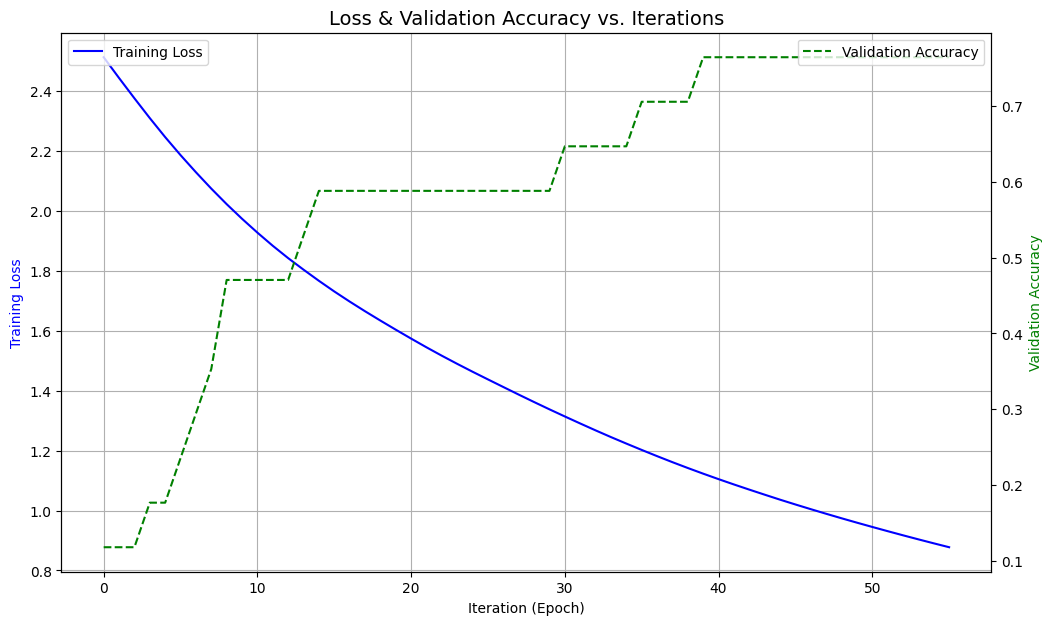

In [13]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define the grid of hyperparameters to search
param_grid = {
    'hidden_layer_sizes': [(k,) for k in range(5, 26, 5)],
    'max_iter': [50, 100, 150, 200, 250]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=MLPClassifier(random_state=42),
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=1,
    verbose=1
)

# Run the search on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Report the best parameters found
best_params_single_layer = grid_search.best_params_
baseline_accuracy = grid_search.best_score_
print(f"\nBest parameters found: {best_params_single_layer}")
print(f"Highest 10-fold CV Accuracy: {baseline_accuracy:.4f}")

# Encode the target variable to integer labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Create and train the optimal model with early stopping
optimal_mlp = MLPClassifier(
    **best_params_single_layer,
    random_state=42,
    early_stopping=True,        # Stop training when validation score is not improving
    validation_fraction=0.1,    # Use 10% of training data for validation
    n_iter_no_change=15         # Number of iterations with no improvement to wait before stopping
)

optimal_mlp.fit(X_train_scaled, y_train_encoded)

# Evaluate the final model's performance
print(f"\nFinal test accuracy of the optimal model: {optimal_mlp.score(X_test_scaled, y_test_encoded):.4f}")
print(f"Number of iterations run: {optimal_mlp.n_iter_}")

# Create a plot to visualize the training process
plt.figure(figsize=(12, 7))

# Plot the training loss on the primary y-axis
plt.plot(optimal_mlp.loss_curve_, label='Training Loss', color='blue')
k_mlp = optimal_mlp.hidden_layer_sizes[0]
plt.title(f'Loss & Validation Accuracy vs. Iterations', fontsize=14)
plt.xlabel('Iteration (Epoch)')
plt.ylabel('Training Loss', color='blue')
plt.legend(loc='upper left')
plt.grid(True)

# Create a second y-axis to plot the validation accuracy
ax2 = plt.gca().twinx()
ax2.plot(optimal_mlp.validation_scores_, label='Validation Accuracy', color='green', linestyle='--')
ax2.set_ylabel('Validation Accuracy', color='green')
ax2.legend(loc='upper right')

plt.show()

## MLP model with two hidden layers

In [14]:
# Get the optimal number of neurons and iterations from the single-layer model
best_k_from_single = best_params_single_layer['hidden_layer_sizes'][0]
iterations_to_use = best_params_single_layer['max_iter']

# Create a list to store the results
results_table_data = []

# Loop through all possible ways to split the neurons between two layers
for n2_neurons in range(1, best_k_from_single):
    n1_neurons = best_k_from_single - n2_neurons
    layer_config = (n1_neurons, n2_neurons)

    # Initialize the MLP model
    mlp_model = MLPClassifier(
        hidden_layer_sizes=layer_config,
        max_iter=iterations_to_use,
        random_state=42
    )
    
    # Evaluate this configuration using cross-validation
    cv_scores = cross_val_score(mlp_model, X_train_scaled, y_train, cv=10, scoring='accuracy', n_jobs=1)
    avg_accuracy = np.mean(cv_scores)

    # Store the results
    results_table_data.append({
        'Configuration': f"({n1_neurons}, {n2_neurons})",
        'Avg CV Accuracy': avg_accuracy
    })

# Create and display a DataFrame for the results
results_df = pd.DataFrame(results_table_data)
results_df = results_df.set_index('Configuration')
print("Summary table of two-layer configurations")
print(results_df.round(4))

# Find the best two-layer configuration
best_two_layer_config = results_df['Avg CV Accuracy'].idxmax()
best_two_layer_accuracy = results_df['Avg CV Accuracy'].max()

# Compare the best two-layer model with the single-layer baseline
print(f"Best accuracy for single layer model: {baseline_accuracy:.4f}")
print(f"Best configuration for two layer model: {best_two_layer_config} with an accuracy of {best_two_layer_accuracy:.4f}")

Summary table of two-layer configurations
               Avg CV Accuracy
Configuration                 
(14, 1)                 0.2379
(13, 2)                 0.4235
(12, 3)                 0.4871
(11, 4)                 0.6246
(10, 5)                 0.5938
(9, 6)                  0.6426
(8, 7)                  0.7066
(7, 8)                  0.5643
(6, 9)                  0.7199
(5, 10)                 0.6551
(4, 11)                 0.5585
(3, 12)                 0.4882
(2, 13)                 0.4338
(1, 14)                 0.3684
Best accuracy for single layer model: 0.7555
Best configuration for two layer model: (6, 9) with an accuracy of 0.7199
